In [1]:

# ! pip install numpy
# ! pip install pandas
# ! pip install tqdm


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from scipy import stats
from tqdm import tqdm
import math 

# from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('BlueBikeDay.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Data Card

| Feature | Description |
| ------ | ------ |
| instant | Primary Key |
| dteday | Date in mm/dd/yy |
| season | seasons [1:spring, 2:summer, 3:fall, 4:winter] |
| yr | year [0: 2011, 1:2012] |
| mnth | [calendar months 1 to 12] |
| holiday | is Holiday? |
| weekday | yday of the week |
| workingday | 0: weekday, 1: weekend/holiday |
| weathersit | weather [1: clear, 2: Cloudy, 3: Snowy, 4: Thunderstorm] |
| temp |  temperature in Celsius. |
| atemp | Feels like temperature in Celsius. |
| hum | Humidity |
| windspeed | windspeed |
| casual | count of casual users |
| registered | count of registered users |
| cnt | Total registered |

In [4]:
df.info()
# since dteday is a string, we need to convert it to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df['dteday'] = pd.to_datetime(df['dteday'])

why convert obj to Datetime: for better timeseries analysis like ARIMA

In [6]:
df_with_climate = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

explain KDE curve

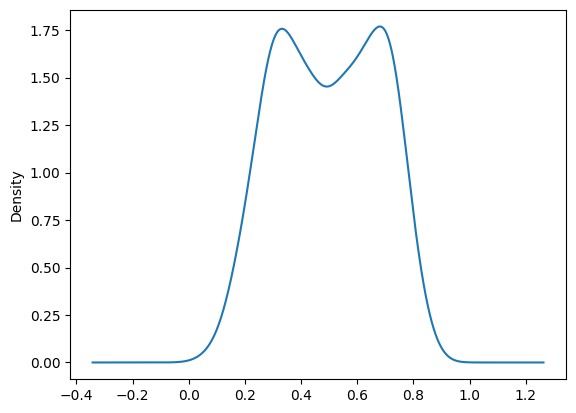

In [7]:
temp_curve = df_with_climate['temp'].plot.kde()

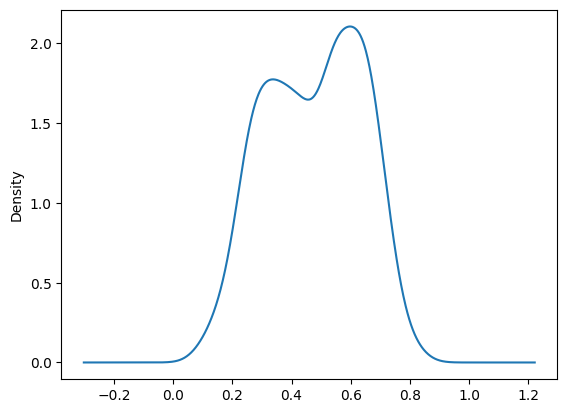

In [8]:
atemp_curve = df_with_climate['atemp'].plot.kde()

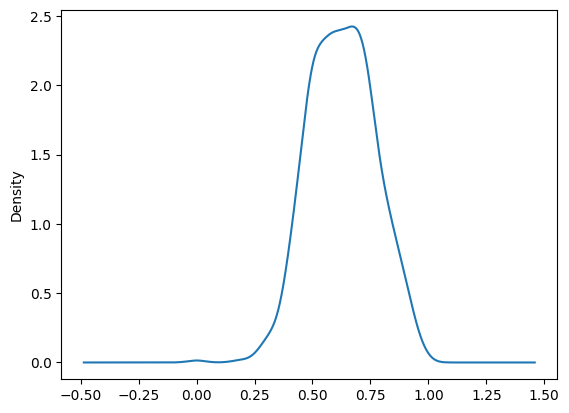

In [9]:
humidity_curve = df_with_climate['hum'].plot.kde()

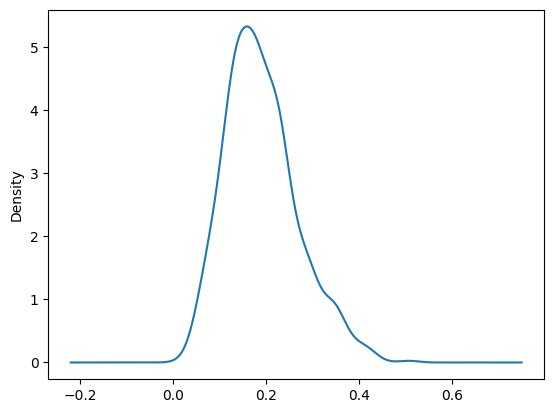

In [10]:
windspeed_curve = df_with_climate['windspeed'].plot.kde()

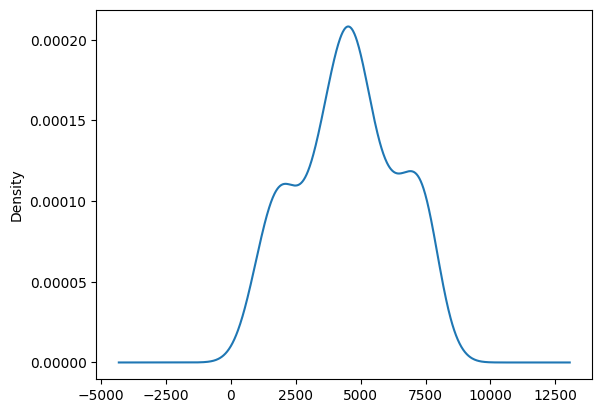

In [11]:
cnt_curve = df_with_climate['cnt'].plot.kde()

We can see that that temp, atemp, hum and windspeed all have a bell curve.
what is gaussia curve

outliers and what they are, why do we want to remove them(euclidian dist based algorithms are sensetive to outliers)

<Axes: xlabel='registered'>

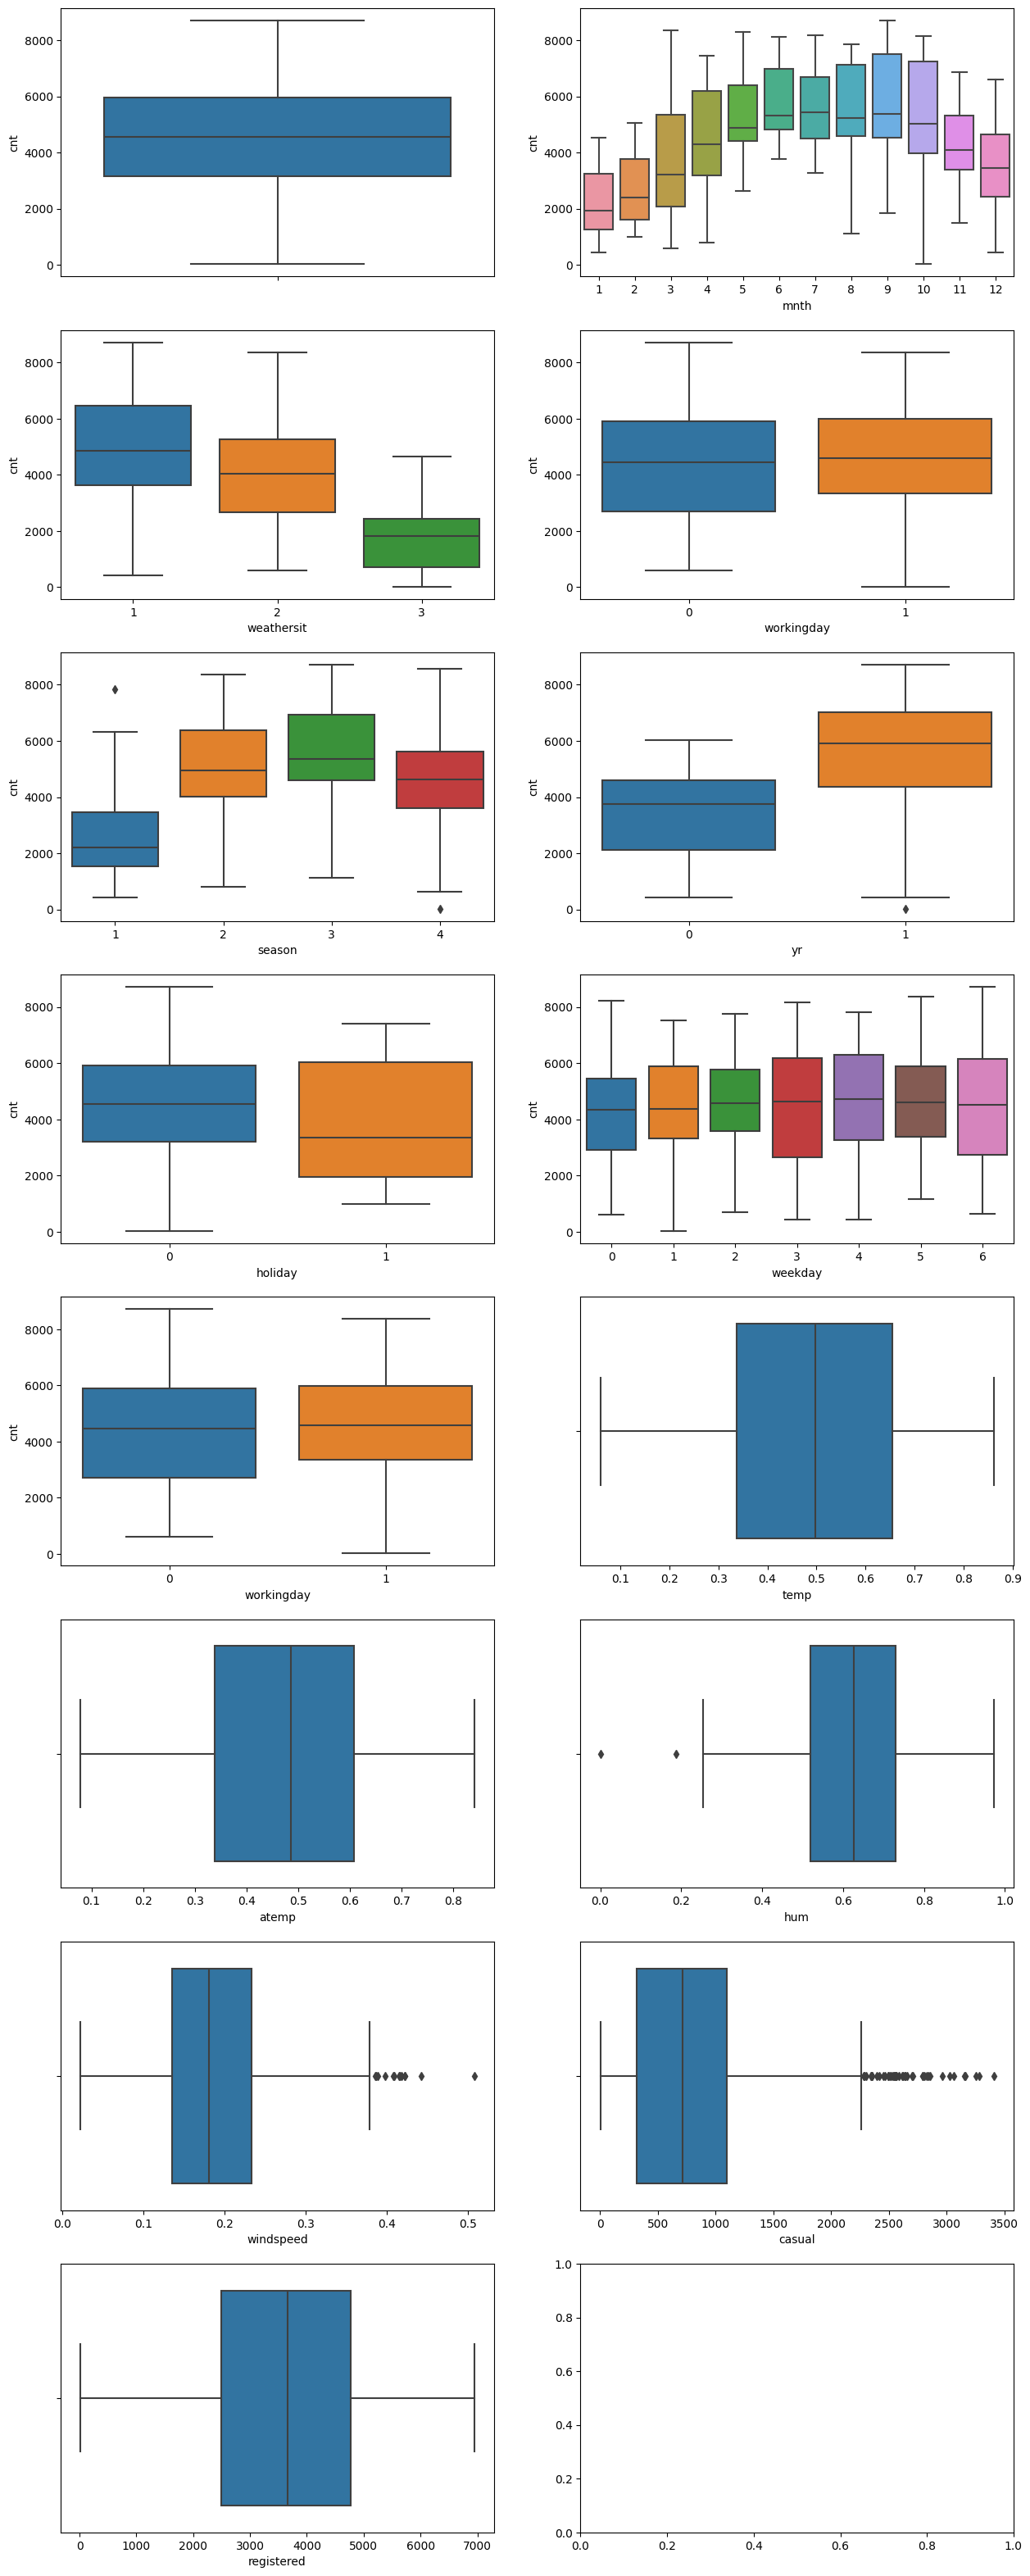

In [12]:
fig,ax = plt.subplots(ncols=2, nrows= 8, figsize = (15,40))
sns.boxplot(data=df, y = 'cnt',ax=ax[0][0])
sns.boxplot(data=df, x = 'mnth', y = 'cnt',ax=ax[0][1])
sns.boxplot(data=df, x = 'weathersit', y = 'cnt', ax=ax[1][0])
sns.boxplot(data=df, x = 'workingday', y = 'cnt',ax=ax[1][1])
sns.boxplot(data=df, x = 'season', y = 'cnt',ax=ax[2][0])
sns.boxplot(data=df, x = 'yr', y = 'cnt',ax=ax[2][1])
sns.boxplot(data=df, x = 'holiday', y = 'cnt',ax=ax[3][0])
sns.boxplot(data=df, x = 'weekday', y = 'cnt',ax=ax[3][1])
sns.boxplot(data=df, x = 'workingday', y = 'cnt',ax=ax[4][0])
sns.boxplot(data=df, x = 'temp',ax=ax[4][1])
sns.boxplot(data=df, x = 'atemp', ax=ax[5][0])
sns.boxplot(data=df, x = 'hum', ax=ax[5][1])
sns.boxplot(data=df, x = 'windspeed', ax=ax[6][0])
sns.boxplot(data=df, x = 'casual', ax=ax[6][1])
sns.boxplot(data=df, x = 'registered', ax=ax[7][0])

In [13]:
shape_before_removing_outlier = df.shape
shape_before_removing_outlier

(731, 16)

what is z score and how can we find outliers with z-score? why 3 SD?

In [14]:
# removing outlier based on z-score for each row, all column values that are within 3 standard deviations from the mean

df = df[(np.abs(stats.zscore(df.iloc[:, 2:])) < 3).all(axis=1)]

In [15]:
shape_after_removing_outlier = df.shape
shape_after_removing_outlier

# 31 records were removed from the dataset.

(700, 16)

In [16]:
df[['casual', 'registered', 'cnt']]

,casual,registered,cnt
0,331,654,985
1,131,670,801
2,120,1229,1349
3,108,1454,1562
4,82,1518,1600
...,...,...,...
726,247,1867,2114
727,644,2451,3095
728,159,1182,1341
729,364,1432,1796


Looks like cnt = casual + registered
So keeping casual and registered in the train dataset can cause data lekage.
So lets drop casual and registered from the train dataset.
what is data lekage and how extremely colinear features cause data lekage?

<Axes: >

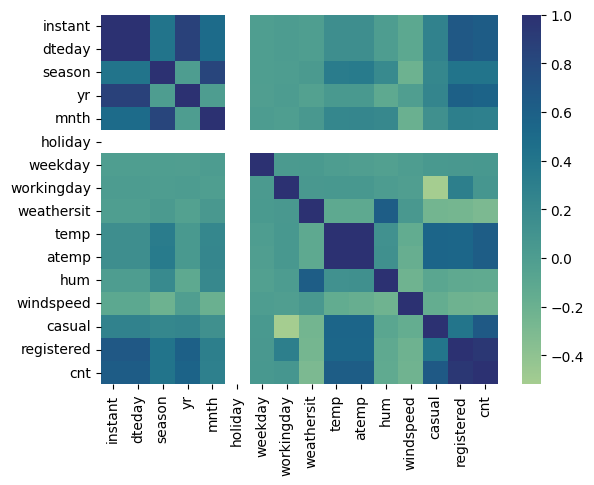

In [17]:
sns.heatmap(df.corr('pearson'), cmap="crest")

Instance feature is just a primary key for the table which is the same as the date column so we can drop instance as well.
Temp feature has a strong correlation with atemp(feels like temperature) so we can drop atemp feature.

In [18]:
X = df.drop(['instant', 'cnt', 'registered', 'casual', 'atemp', 'holiday'], axis=1)
X.reset_index(drop=True, inplace=True)
y = df['cnt']

In [19]:

# # # Split the data into train(80%) and test(20%)
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression:
--what is regression
-what is linear, multilinear, polynomial regression
-what is regularization and why we use it?
-what is Ridge Regression
-what is Lasso Regression
-what is rmse and mae?


In [20]:
class Linear_Regression:
    def __init__(self, X, y, max_iteration, epsilon, lambda_, learning_rate, sgd, gd=True, regularization=True, batch_size = None) -> None:
        self.X = X
        self.y = y
        self.max_iteration = max_iteration
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.learning_rate = learning_rate
        self.sgd = sgd
        self.gd = gd
        self.regularization = regularization
        self.batch_size = batch_size

    def split_data(self):
      X_train, X_test, y_train, y_test = train_test_split(self.X,
                                                          self.y,
                                                          test_size=0.3,
                                                          shuffle= True)
      return X_train, X_test, y_train, y_test

    def add_X0(self, X):
      return np.column_stack([np.ones([X.shape[0], 1]), X])

    def normalize_train(self,X):
      mean = np.mean(X, axis = 0)
      std = np.std(X, axis = 0)
      X = (X - mean) / std
      X = self.add_X0(X)
      return X, mean, std

    def normalize_test(self, X, mean, std):
      X = (X - mean) / std
      X = self.add_X0(X)
      return X

    def rank(self, X):
      u, s, v = np.linalg.svd(X)
      return len([x for x in s if x > 0.0005])

    def check_fullRank(self,X):
      rank = self.rank(X)
      if rank == min(X.shape):
        self.full_rank = True
        # print("it is full rank")
      else:
        self.full_rank = False
        # print("it is not full rank")

    def check_lowRank(self, X):
      if X.shape[0] < X.shape[1]:
        self.low_rank = True
        # print("it is low rank")
      else:
        self.low_rank = False
        # print("it is not low rank")

    def closed_form_solution(self, X, y):
    #Adding the penalty term as L2 Norm
      if self.regularization == True:
        self.theta = np.linalg.inv(X.T.dot(X) + self.lambda_ * np.identity(X.shape[1])).dot(X.T).dot(y)
      else:
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

      return self.theta

    def predict(self, X):
      return X.dot(self.theta)
    
    def sse(self, X, y):
      y_hat = self.predict(X)
      return ((y_hat - y) ** 2).sum()
    
    def calculate_me(self, y_true, y_pred):
      return np.mean(y_true - y_pred)

    def calculate_rmse(self, y_true, y_pred):
      return np.sqrt(np.mean((y_true - y_pred) ** 2))

    def calculate_mae(self, y_true, y_pred):
      return np.mean(np.abs(y_true - y_pred))

    def calculate_mpe(self, y_true, y_pred):
      return np.mean((y_true - y_pred) / y_true) * 100

    def calculate_mape(self, y_true, y_pred):
      return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def cost_function(self, X, y):
      loss = self.sse(X, y)
      return loss / 2
    
    def cost_derivative(self, X, y):
      if self.regularization == 'ridge':
        y_hat = self.predict(X)
        return (X.T.dot(y_hat - y) + self.lambda_ * self.theta)
      elif self.regularization == 'lasso':
        y_hat = self.predict(X)
        return (X.T.dot(y_hat - y)+ np.sign(self.theta))
      else:
        y_hat = self.predict(X)
        return X.T.dot(y_hat - y)

    def gradient_descent(self, X, y):
      errors = []
      prev_error = float("inf")

      for t in tqdm(range(self.max_iteration), colour = 'blue'):
        self.theta -= self.learning_rate * self.cost_derivative(X, y)
        error = self.cost_function(X, y)
        errors.append(error)

        if abs(error - prev_error) < self.epsilon:
          print("Model stopped learning")
          break

      self.plot_rmse(errors)    
      
    def stocastic_gradient_descent(self, X, y):
      errors = []
      prev_error = float("inf")
      
      print("Batch size: " + str(int(len(y) * self.batch_size)))
      
      self.slice_rowsX = int(X.shape[0] * self.batch_size)
      self.slice_rowsy = int(len(y) * self.batch_size)
      
      #slice X till batch_size
      sgdX = X[:self.slice_rowsX, :]
      sgdy = y[:self.slice_rowsy]

      for t in tqdm(range(self.max_iteration), colour = 'blue'):
        self.theta -= self.learning_rate * self.cost_derivative(sgdX, sgdy)
        error = self.cost_function(sgdX, sgdy)
        errors.append(error)

        if abs(error - prev_error) < self.epsilon:
          print("Model stopped learning")
          break

      self.plot_rmse(errors)

    def plot_prediction_comparison(self, y_true, y_pred):
      days = np.arange(len(y_true))  # Assuming one count per day
      
      plt.figure(figsize=(10, 6))
      plt.plot(days, y_true, color='black', label='True Values')
      plt.plot(days, y_pred, color='orange', label='Predicted Values')
      plt.xlabel('Days')
      plt.ylabel('Counts')
      plt.title('True Values vs. Predicted Values')
      plt.legend()
      plt.grid(True)
      plt.show()
    
    def fit(self):
      X_train, X_test, y_train, y_test = self.split_data()
      X_train, mean, std = self. normalize_train(X_train)
      X_test = self.normalize_test(X_test, mean, std)
      self.check_fullRank(X_train)
      self.check_lowRank(X_train)

      if self.full_rank and not self.low_rank and X_train.shape[1] < 1000 and not self.gd and not self.sgd:
          print("Closed form solution")
          self.closed_form_solution(X_train, y_train)
      elif self.gd or self.low_rank:
        print("Gradient Descent")
        self.theta = np.ones(X_train.shape[1])
        self.gradient_descent (X_train, y_train)
      else:
        print("Stochastic Gradient Descent")
        self.theta = np.ones(X_train.shape[1])
        self.stocastic_gradient_descent(X_train, y_train)

      y_pred = self.predict(X_test)
      # print('Thetas: ', self.theta)
      # print("Predicted values:", y_pred)
      # print("True values:", y_test)
      self.plot_prediction_comparison(y_test, y_pred)
      
      rmse = self.calculate_rmse(y_test, y_pred)
      mae = self.calculate_mae(y_test, y_pred)
      me = self.calculate_me(y_test, y_pred)
      mpe = self.calculate_mpe(y_test, y_pred)
      mape = self.calculate_mape(y_test, y_pred)

      print("Mean Error (ME):", me)
      print("Root Mean Squared Error (RMSE):", rmse)
      print("Mean Absolute Error (MAE):", mae)
      print("Mean Percentage Error (MPE):", mpe)
      print("Mean Absolute Percentage Error (MAPE):", mape)


    def plot_rmse(self, error_sequence):
        """
        @X: error_sequence, vector of rmse
        @does: Plots the error function
        @return: plot
        """
        # Data for plotting
        s = np.array(error_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel=list(range(len(error_sequence))))
        ax.grid()

        plt.legend(["Error Curve"], bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()


Closed form solution


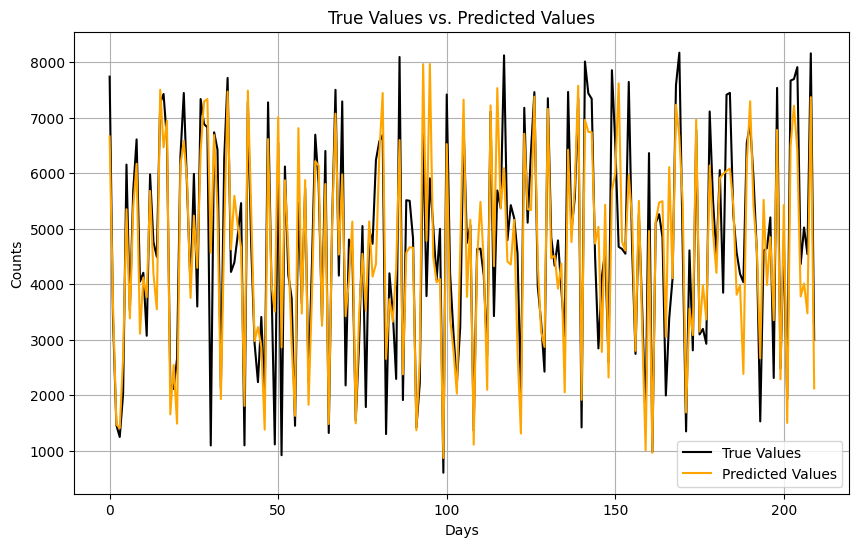

Mean Error (ME): 72.15791474787018
Root Mean Squared Error (RMSE): 898.8429282318448
Mean Absolute Error (MAE): 677.5718610048791
Mean Percentage Error (MPE): -4.709269830068531
Mean Absolute Percentage Error (MAPE): 19.716112129686692


In [21]:
# Closed form solution

lr = Linear_Regression(X.iloc[:, 1:], y, max_iteration=8000, epsilon=0.03, learning_rate=0.00001, lambda_ = 0.01, sgd = False, gd = False, regularization=False)
lr.fit()

Gradient Descent


100%|██████████| 8000/8000 [00:00<00:00, 8367.73it/s]


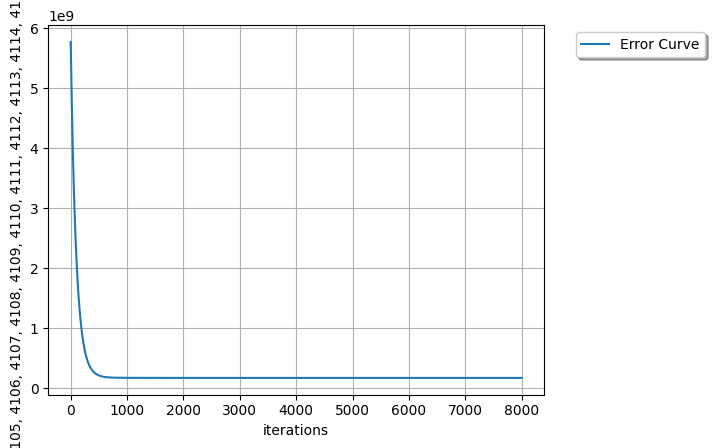

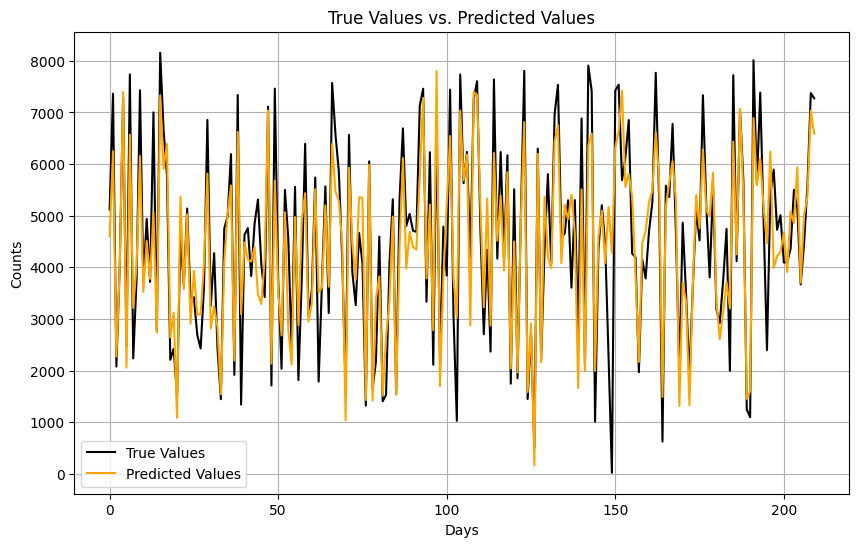

Mean Error (ME): 86.61674516749532
Root Mean Squared Error (RMSE): 861.7110917585179
Mean Absolute Error (MAE): 660.4493392342694
Mean Percentage Error (MPE): -95.45111249924325
Mean Absolute Percentage Error (MAPE): 110.32436094355278


In [22]:
# Gradient Descent without Regularization

lr = Linear_Regression(X.iloc[:, 1:], y, max_iteration=8000, epsilon=0.03, learning_rate=0.00001, lambda_ = 0.01, sgd = False, gd = True, regularization=False)
lr.fit()

Gradient Descent


100%|██████████| 8000/8000 [00:01<00:00, 7773.39it/s]


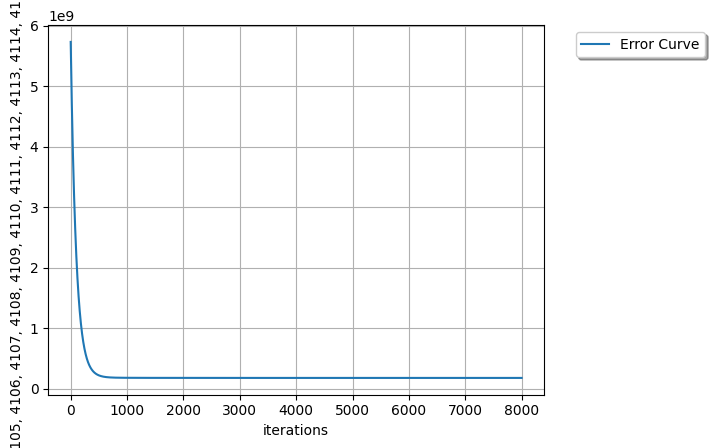

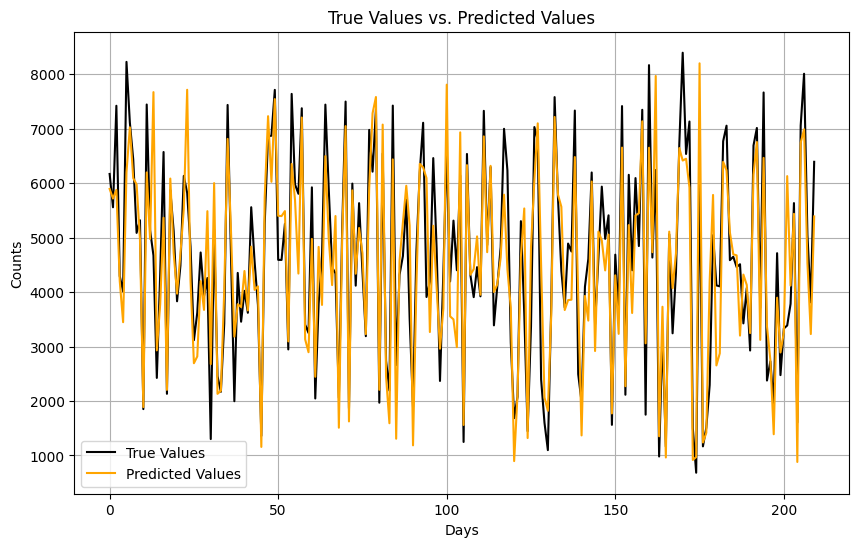

Mean Error (ME): 83.29925204143103
Root Mean Squared Error (RMSE): 852.2054422597014
Mean Absolute Error (MAE): 656.8037072205435
Mean Percentage Error (MPE): -1.007766963479093
Mean Absolute Percentage Error (MAPE): 16.832577861618553


In [23]:
# Gradient Descent with Lasso Regularization

lr = Linear_Regression(X.iloc[:, 1:], y, max_iteration=8000, epsilon=0.03, learning_rate=0.00001, lambda_ = 0.01, sgd = False, gd = True, regularization='lasso')
lr.fit()

Gradient Descent


100%|██████████| 8000/8000 [00:01<00:00, 7650.93it/s]


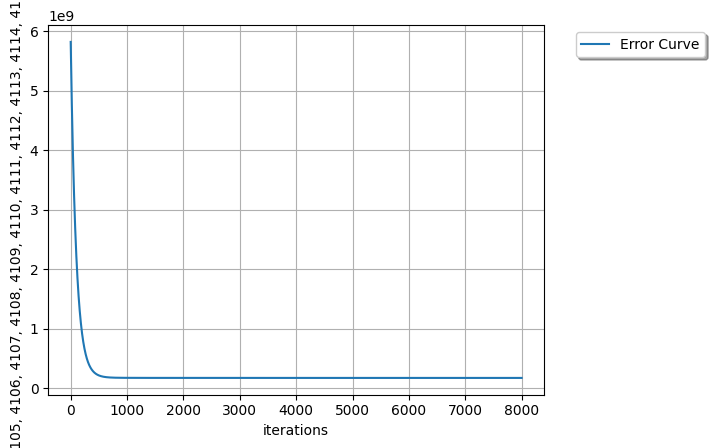

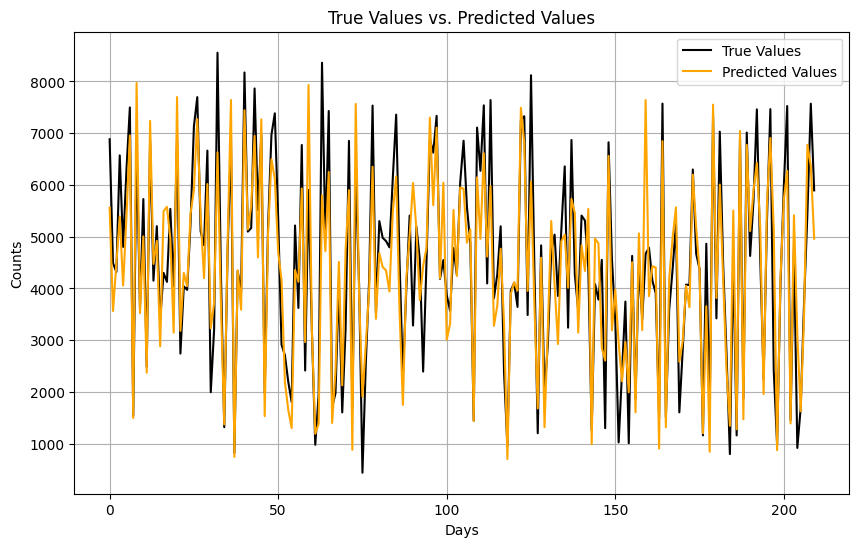

Mean Error (ME): 85.00491432197931
Root Mean Squared Error (RMSE): 863.2036300709743
Mean Absolute Error (MAE): 667.7581382227066
Mean Percentage Error (MPE): -3.9081877957776476
Mean Absolute Percentage Error (MAPE): 20.194738554375053


In [24]:
# Gradient Descent with Ridge Regularization

lr = Linear_Regression(X.iloc[:, 1:], y, max_iteration=8000, epsilon=0.03, learning_rate=0.00001, lambda_ = 0.01, sgd = False, gd = True, regularization='ridge')
lr.fit()

compare rmse for
close form,
gradient descent,
gd with lasso,
gd with ridge,

### ARIMA

what is time series data, how is time series data different than normal data ,why is our data time series, why is arima better than linear regression for time series data?

2. explain arima steps: finding stationart, ar phase, ma phase, combine phase.

In [25]:
df = pd.read_csv('BlueBikeDay.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


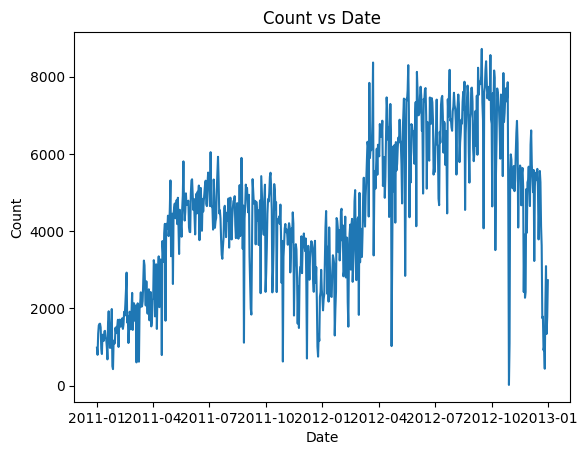

In [26]:
import matplotlib.pyplot as plt

plt.plot(df['dteday'], df['cnt'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count vs Date')
plt.show()


#### Making Data Stationary

this time series data is not stationary as we see a seasonal pattern in the data.
we first have to find the difference order to make the data stationary.


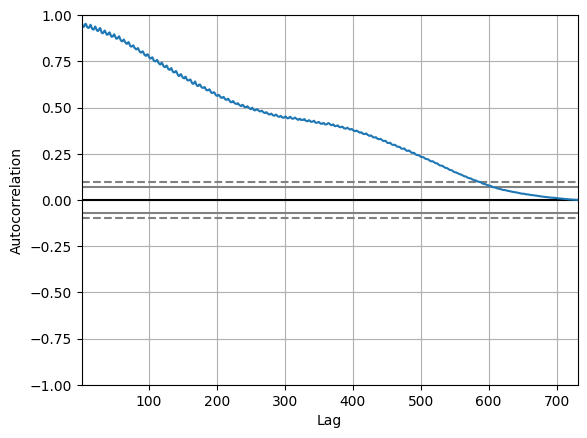

In [27]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.iloc[:, 2:])
plt.show()

keeping lag to 200 can improve the model significantly

To find if the data is stationary, first the target variable should be converted to log values.

In [28]:
df_log = df.copy(deep = True)
df_log['log_cnt'] = np.log(df_log.cnt)
df_log

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,log_cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,6.892642
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,6.685861
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,7.207119
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,7.353722
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,7.377759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,7.656337
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,8.037543
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,7.201171
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,7.493317


In [29]:
# ! pip install statsmodels

In [30]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_log.iloc[:, -1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.482190
p-value: 0.119868
	1%: -3.440
	5%: -2.866
	10%: -2.569


1. time series is considered stationary if the p-value is low and the p-values at 1%, 5%, 10% are close to each other. Therefore we have strong evidence against the null hypothesis that data is stationary and we can reject the null hypothesis. 
2. since Data is stationary we do not have to make it stationary.

#### Identifying p and q values

1. Explain ACF plot
2. Explain PACF plot
3. from the results of ACF and PACF plots, we can see that there is a drop after 10 lags.

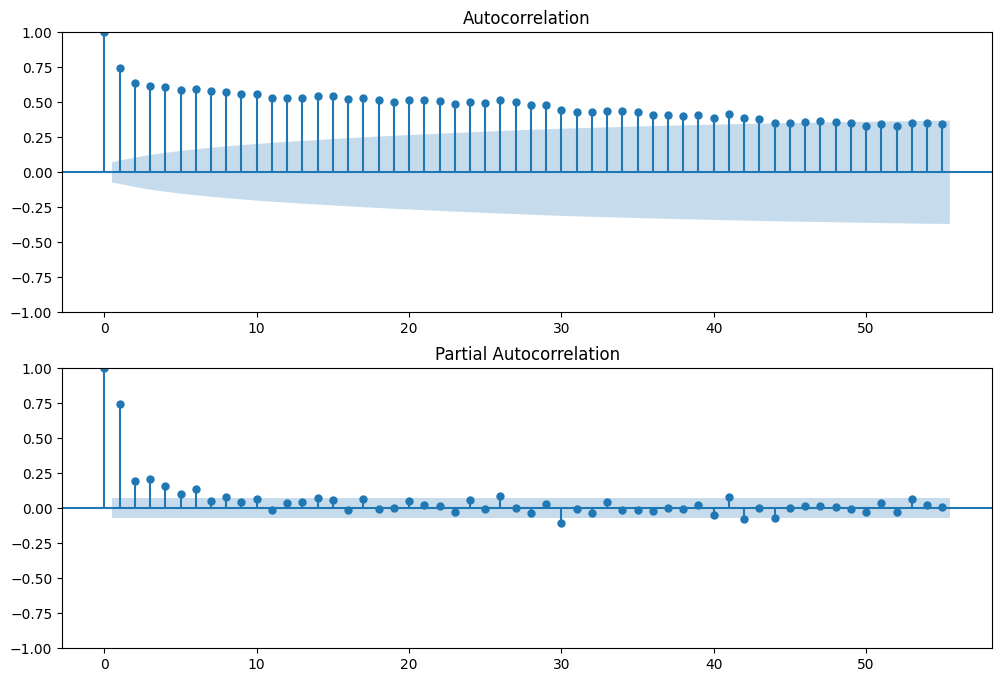

In [31]:
import statsmodels.api as sm

fig = plt.figure(figsize = (12,8))
acf_axis = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_log['log_cnt'], lags = 55, ax = acf_axis)
pacf_axis = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_log['log_cnt'], lags = 55, ax = pacf_axis)

#### AR Model

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import math

# rename AR1 to auto regresor
def AR_1(p, df_raw):
    df = df_raw.copy(deep=True)

    # Create lagged columns
    for i in range(1, p + 1):
        df[f'Shifted_values_{i}'] = df['log_cnt'].shift(i)

    df.dropna(inplace=True)

    # Split data into train and test sets
    X = df.iloc[:, 0:12].values
    y = df[f'Shifted_values_{p}'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train linear regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Predictions
    train_pred = lr.predict(X_train)
    test_pred = lr.predict(X_test)

    # Combine actual and predicted values
    train_results = pd.DataFrame({'log_cnt': y_train, 'predicted_count_AR': train_pred})
    test_results = pd.DataFrame({'log_cnt': y_test, 'predicted_count_AR': test_pred})
    y = pd.concat([train_results, test_results])
    y.reset_index(drop=True, inplace=True)

    # Update DataFrame with predicted values
    AR1_df = df.copy(deep=True)
    AR1_df['log_cnt'] = y['log_cnt']
    AR1_df['predicted_count_AR'] = y['predicted_count_AR']

    # Calculate RMSE
    SSE = ((test_results['predicted_count_AR'] - test_results['log_cnt']) ** 2).sum()
    RMSE = math.sqrt(SSE / test_results['log_cnt'].size)

    print("Best RMSE of: ", RMSE, " is for p:", p)
    return [AR1_df, lr.coef_.T, lr.intercept_, RMSE]


In [68]:
# AR_1(1,df_log.iloc[:, 2:])

In [69]:
def MA_1(q, res):
    for i in range(1, q+1):
        res[f'Residual_shift_{i}'] = res['Residuals'].shift(i)

    res = res.dropna()

    # Split data into train and test sets
    X = res.iloc[:, :12].values
    y_shifted = res[f'Residual_shift_{q}'].values

    X_train, X_test, y_train_shifted, y_test_shifted = train_test_split(
        X, y_shifted, test_size=0.3, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train_shifted)

    theta = lr.coef_.T
    intercept = lr.intercept_

    train_pred = -(X_train.dot(theta) + intercept)
    train_results = pd.DataFrame({'Residuals': y_train_shifted, 'predicted_count_MA': train_pred})

    test_pred = -(X_test.dot(theta) + intercept)
    test_results = pd.DataFrame({'Residuals': y_test_shifted, 'predicted_count_MA': test_pred})

    # Combine actual and predicted values
    y = pd.concat([train_results, test_results])
    y.reset_index(drop=True, inplace=True)

    # Update DataFrame with predicted values
    MA1_df = res.copy(deep=True)
    MA1_df['Residuals'] = y['Residuals']
    MA1_df['predicted_count_MA'] = y['predicted_count_MA']

    # Calculate RMSE
    SSE = ((test_results['predicted_count_MA'] - test_results['Residuals']) ** 2).sum()
    RMSE = math.sqrt(SSE / test_results['Residuals'].size)

    print("The RMSE is:", RMSE, ", Value of q:", q)
    return [MA1_df, RMSE]


In [100]:
def ARIMA(rental_hour_pred):
    rental_hour_pred_copy = rental_hour_MA1.copy()

    rental_hour_pred_copy['predicted_count'] = rental_hour_pred_copy['predicted_count_MA']

    rental_hour_pred_copy['log_cnt'] = rental_hour_pred_copy['log_cnt'] + np.log(df.shift(1)['cnt'])
    
    rental_hour_pred_copy['predicted_count'] = rental_hour_pred_copy['predicted_count'] + np.log(df.shift(1)['cnt'])

    rental_hour_pred_copy['log_cnt'] = np.exp(rental_hour_pred_copy['cnt'])
    
    rental_hour_pred_copy['predicted_count'] = np.exp(rental_hour_pred_copy['predicted_count'])

    # rental_hour_pred_copy[['cnt','predicted_count']].head()
    rental_hour_pred_copy[['cnt', 'predicted_count']].plot()
    # rental_hour_pred_copy[['cnt','predicted_count']].plot()

    SSE = ((rental_hour_pred_copy['predicted_count'] - rental_hour_pred_copy['cnt']) ** 2).sum()
    RMSE = math.sqrt((SSE / rental_hour_pred_copy['cnt'].size) / 4)

    print("RMSE score for ARMA Model:", RMSE)
    return RMSE


In [101]:
best_RMSE=100000000000
best_p = -1

for i in range(1,40):
    [rental_hour_AR1 ,theta1,intercept1,RMSE1] = AR_1(i,df_log.iloc[:, 2:])
    if(RMSE1<best_RMSE):
        best_RMSE = RMSE1
        best_p = i

print("Best p is: ", best_p)


Best RMSE of:  0.3371538214966868  is for p: 1
Best RMSE of:  0.4676057342950924  is for p: 2
Best RMSE of:  0.48972055661597175  is for p: 3
Best RMSE of:  0.29250634290611816  is for p: 4
Best RMSE of:  0.2640050263674016  is for p: 5
Best RMSE of:  0.2986800095119281  is for p: 6
Best RMSE of:  0.2939207609388983  is for p: 7
Best RMSE of:  0.27320833547772166  is for p: 8
Best RMSE of:  0.4558200271429992  is for p: 9
Best RMSE of:  0.30066933258712414  is for p: 10
Best RMSE of:  0.4887636470903991  is for p: 11
Best RMSE of:  0.479305189984128  is for p: 12
Best RMSE of:  0.2777646750553476  is for p: 13
Best RMSE of:  0.4788735779268271  is for p: 14
Best RMSE of:  0.46683862863091147  is for p: 15
Best RMSE of:  0.2912712908261067  is for p: 16
Best RMSE of:  0.47261275094849  is for p: 17
Best RMSE of:  0.48177675804213577  is for p: 18
Best RMSE of:  0.4681002833217277  is for p: 19
Best RMSE of:  0.46766481465587395  is for p: 20
Best RMSE of:  0.29467906829340673  is for p:

In [102]:
rental_hour_AR1 ,theta1,intercept1,RMSE1 = AR_1(best_p,
                                                df_log.iloc[:, 2:])

Best RMSE of:  0.2640050263674016  is for p: 5


In [103]:
rental_hour_AR1['Residuals'] = rental_hour_AR1['log_cnt'] - rental_hour_AR1['predicted_count_AR']
# rental_hour_AR1['Residuals'].plot(kind = 'kde')

best_RMSE=100000000000
best_q = -1

for i in range(1,30):
    [rental_hour_MA1,RMSE] = MA_1(i,rental_hour_AR1)
    if(RMSE<best_RMSE):
        best_RMSE = RMSE
        best_q = i
  
print(best_q)

The RMSE is: 0.35411225719799616 , Value of q: 1
The RMSE is: 0.3602923480777686 , Value of q: 2
The RMSE is: 0.36724492422394417 , Value of q: 3
The RMSE is: 0.3715599138165044 , Value of q: 4
The RMSE is: 0.36470111251516285 , Value of q: 5
The RMSE is: 0.36157531062727616 , Value of q: 6
The RMSE is: 0.3479362101387471 , Value of q: 7
The RMSE is: 0.3632335396908147 , Value of q: 8
The RMSE is: 0.35454180273344654 , Value of q: 9
The RMSE is: 0.3573347540157583 , Value of q: 10
The RMSE is: 0.3593528658937363 , Value of q: 11
The RMSE is: 0.35724954628437317 , Value of q: 12
The RMSE is: 0.3682537023652976 , Value of q: 13
The RMSE is: 0.37818875063342955 , Value of q: 14
The RMSE is: 0.37594318955226363 , Value of q: 15
The RMSE is: 0.37185342120594017 , Value of q: 16
The RMSE is: 0.34735557614765356 , Value of q: 17
The RMSE is: 0.34986870991267727 , Value of q: 18
The RMSE is: 0.3768409930758039 , Value of q: 19
The RMSE is: 0.36324846914821496 , Value of q: 20
The RMSE is: 0.37

In [104]:
[rental_hour_MA1,RMSE] = MA_1(best_q,rental_hour_AR1)

The RMSE is: 0.2979848214414454 , Value of q: 17


RMSE score for ARMA Model: 572.2455410756563


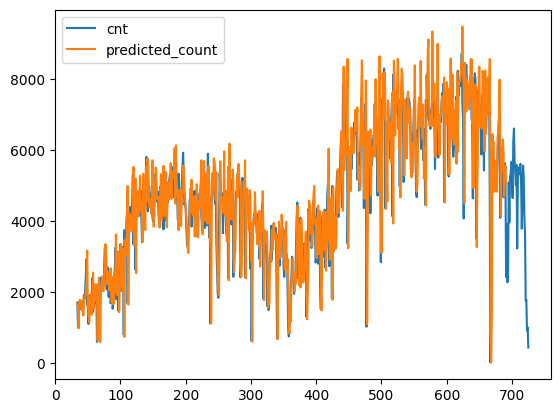

In [105]:
RMSE_Arima = ARIMA(rental_hour_MA1)